**Лабораторная работа №2**

In [242]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Построение ковариационной функции, семивариограммы и спектральной плотности.**

In [243]:
def R_1(t, D, a):
    return D * math.exp(- a * abs(t))
def R_2(t, D, a, b):
    return D * math.exp(- a * abs(t)) * (math.cos(b * t) - (a / b) * math.sin(b * abs(t)))
def Semivar_1(t, D, a):
    return R_1(0, D, a) - R_1(t, D, a)
def Semivar_2(t, D, a, b):
    return R_2(0, D, a, b) - R_2(t, D, a, b)
def S_1(l, D, a):
    return (D * a) / (math.pi * ((a * a) + (l * l)))
def S_2(l, D, a, b):
    return (2 * D * a * l * l) / (math.pi * (math.pow((l * l) + (a * a) + (b * b), 2) - (4 * a * a * b * b)))    

Задание параметров

In [244]:
length = 80
t = np.arange(0, length)
l  = np.arange(0, 4, 4 / length)
param_n = 3
a = [0.1, 0.5, 1]
D = [0.8, 2, 3]
b = [0.1, 0.2, 0.3]

1\) 1-ая ковариационная функция из таблицы.

График ковариационной функции.

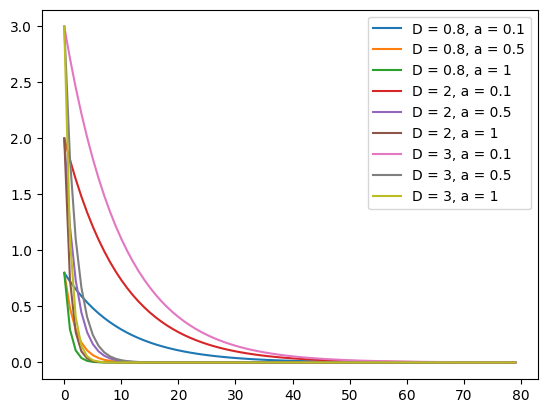

In [245]:

r_1 = [0.] * length
for d_x in D:
        for a_x in a:
            for i in range(length):
                r_1[i] = R_1(i, d_x, a_x)
            
            plt.plot(t, r_1, label = f'D = {d_x}, a = {a_x}')

plt.legend()
plt.show()



График семивариограммы.

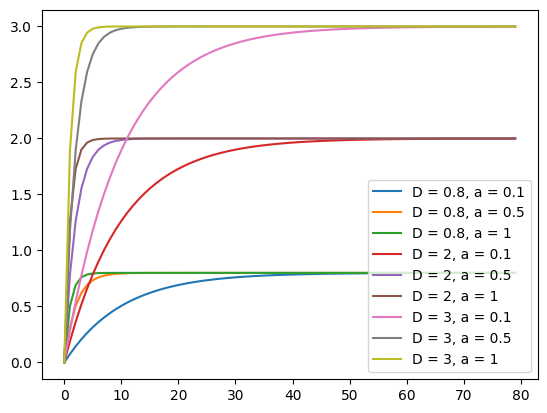

In [246]:
semivar_1 = [0.] * length
for d_x in D:
        for a_x in a:
            for i in range(length):
                semivar_1[i] = Semivar_1(i, d_x, a_x)
            
            plt.plot(t, semivar_1, label = f'D = {d_x}, a = {a_x}')

plt.legend()
plt.show()

График спектральной плотности.

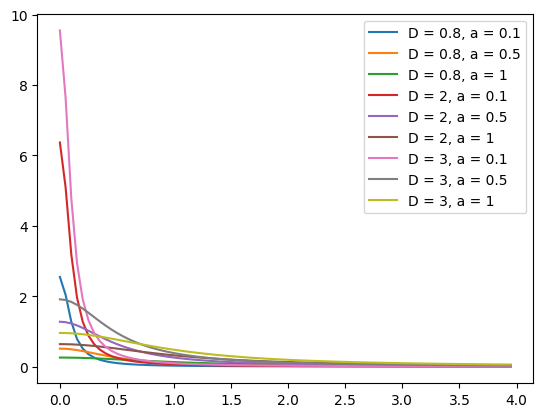

In [247]:
s_1 = [0.] * length
for d_x in D:
        for a_x in a:
            for i in range(length):
                s_1[i] = S_1(l[i], d_x, a_x)

            plt.plot(l, s_1, label = f'D = {d_x}, a = {a_x}')
            
plt.legend()
plt.show()

2\) 5-ая ковариационная функция из таблицы.

График ковариационной функции.

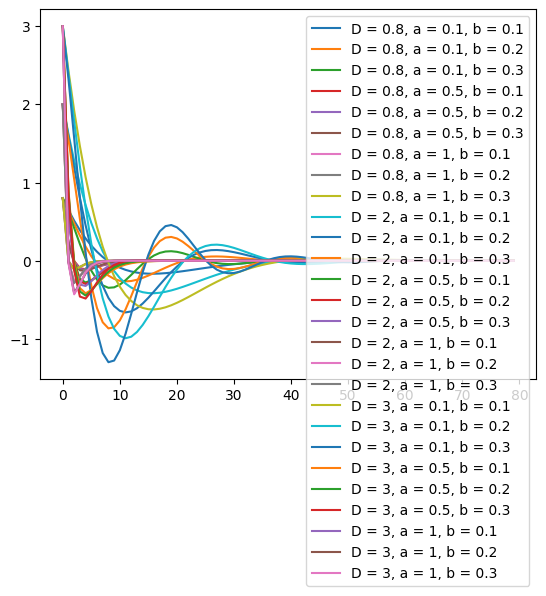

In [248]:
r_2 = [0.] * length
for d_x in D:
        for a_x in a:
            for b_x in b:
                for i in range(length):
                    r_2[i] = R_2(i, d_x, a_x, b_x)
            
                plt.plot(t, r_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
                
plt.legend()
plt.show()

График семивариограммы.

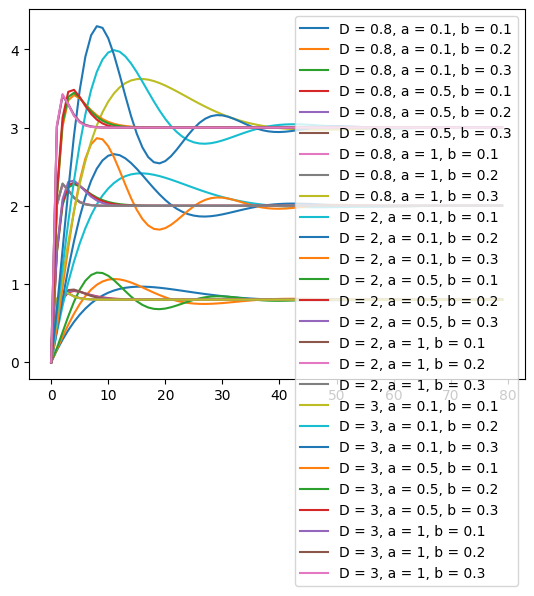

In [249]:
semivar_2 = [0.] * length
for d_x in D:
        for a_x in a:
            for b_x in b:
                for i in range(length):
                    semivar_2[i] = Semivar_2(i, d_x, a_x, b_x)
            
                plt.plot(t, semivar_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
                
plt.legend()
plt.show()

График спектральной плотности.

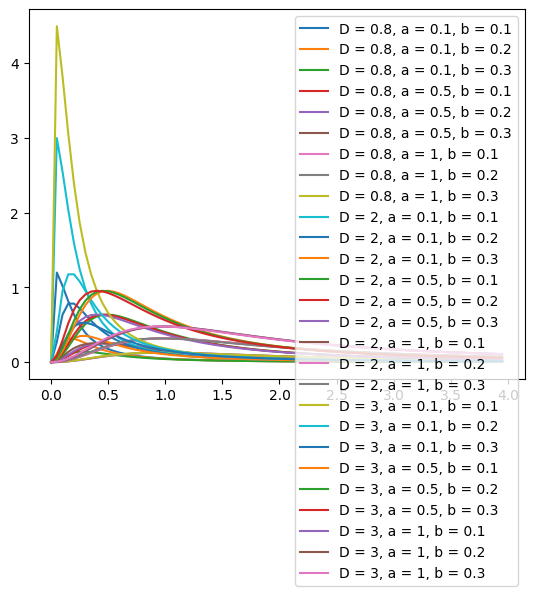

In [250]:
s_2 = [0.] * length
for d_x in D:
        for a_x in a:
            for b_x in b:
                for i in range(length):
                    s_2[i] = S_2(l[i], d_x, a_x, b_x)

                plt.plot(l, s_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
            
plt.legend()
plt.show()

**Задание 2. Время корреляции.**

In [251]:
def t0_1(a):
    return [1 / a, 1 / a, 1 / (2 * a)]
def t0_2(a, b):
    return [0, math.nan, 1 / (4 * a)]

1-ая ковариационная функция.

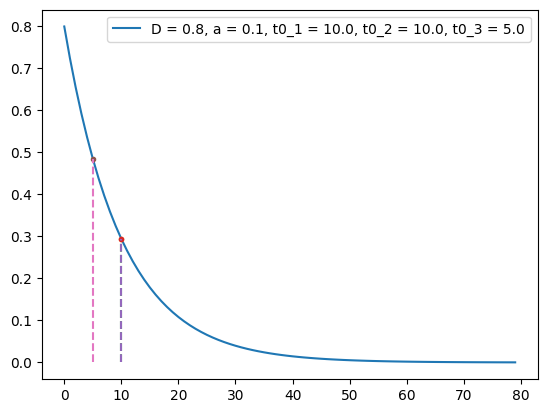

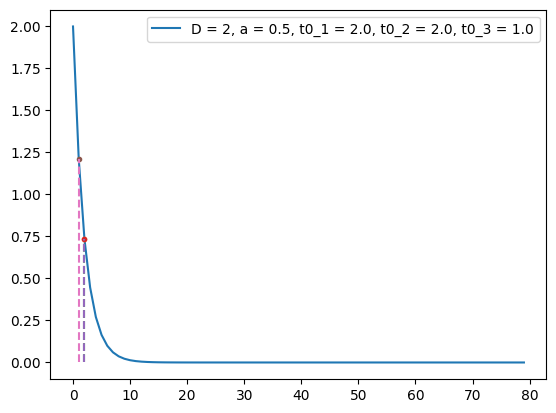

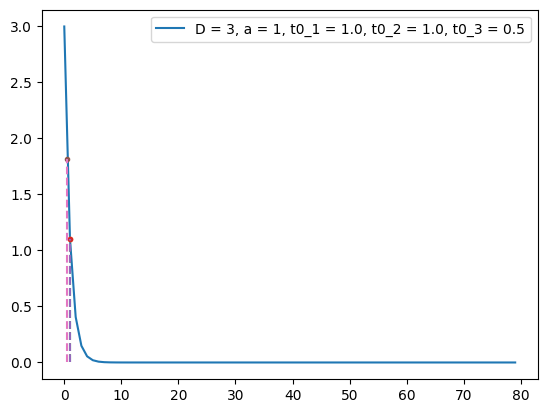

In [262]:
t0 = [[]] * param_n
for i in range(param_n):
    t0[i] = t0_1(a[i])
    for j in range(length):
        r_1[j] = R_1(t[j], D[i], a[i])
            
    plt.plot(t, r_1, label = f'D = {D[i]}, a = {a[i]}, t0_1 = {t0[i][0]}, t0_2 = {t0[i][1]}, t0_3 = {t0[i][2]}')

    for t0_x in t0[i]:
        plt.plot(t0_x, R_1(t0_x, D[i], a[i]), '.')
        plt.plot((t0_x, t0_x), (0, R_1(t0_x, D[i], a[i])), '--')
    
    plt.legend()
    plt.show()

5-ая ковариационная функция.

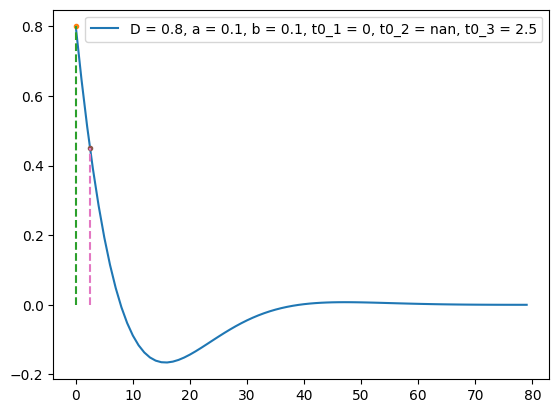

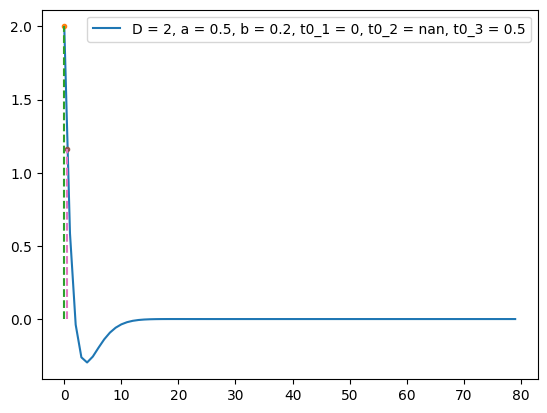

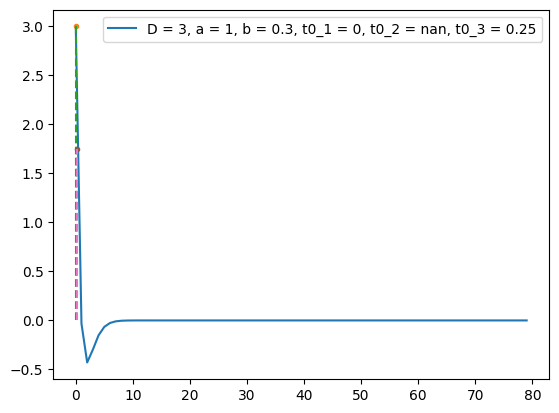

In [261]:
t0 = [[]] * param_n
for i in range(param_n):
    t0[i] = t0_2(a[i], b[i])
    for j in range(length):
        r_2[j] = R_2(t[j], D[i], a[i], b[i])
            
    plt.plot(t, r_2, label = f'D = {D[i]}, a = {a[i]}, b = {b[i]}, t0_1 = {t0[i][0]}, t0_2 = {t0[i][1]}, t0_3 = {t0[i][2]}')

    for t0_x in t0[i]:
        plt.plot(t0_x, R_2(t0_x, D[i], a[i], b[i]), '.')
        plt.plot((t0_x, t0_x), (0, R_2(t0_x, D[i], a[i], b[i])), '--')
    
    plt.legend()
    plt.show()

**Задание 3. Ширина спектра.**

In [254]:
def L1(D, a):
    return R_1(0, D, a) / S_1(0, D, a)

def L2(D, a, b):
    l_e = math.sqrt((a * a) + (b * b))
    return l_e + (R_2(0, D, a, b) / (4 * S_2(l_e, D, a, b)))

Ширина спектра для 1-ой ковариационной функции при трёх наборах параметров.

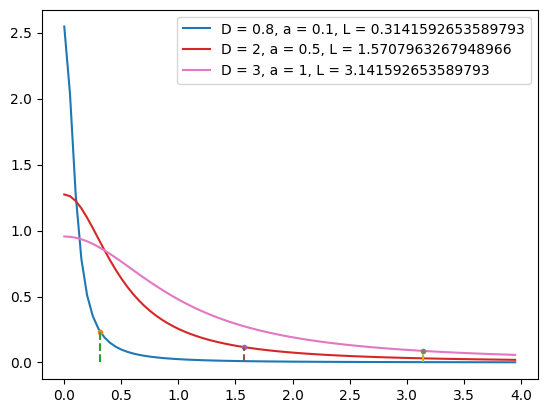

In [255]:
l1 = [0.] * param_n
for i in range(param_n):
    l1[i] = L1(D[i], a[i])
    for j in range(length):
        s_1[j] = S_1(l[j], D[i], a[i])
            
    plt.plot(l, s_1, label = f'D = {D[i]}, a = {a[i]}, L = {l1[i]}')

    plt.plot(l1[i], S_1(l1[i], D[i], a[i]), '.')
    plt.plot((l1[i], l1[i]), (0, S_1(l1[i], D[i], a[i])), '--')

plt.legend()
plt.show()

Ширина спектра для 5-ой ковариационной функции при трёх наборах параметров.

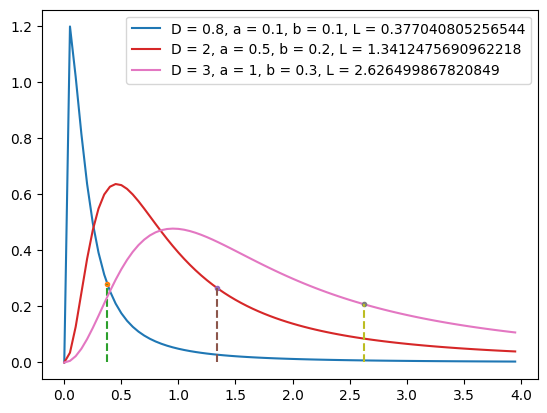

In [257]:
l2 = [0.] * param_n
for i in range(param_n):
    l2[i] = L2(D[i], a[i], b[i])
    for j in range(length):
        s_2[j] = S_2(l[j], D[i], a[i], b[i])
            
    plt.plot(l, s_2, label = f'D = {D[i]}, a = {a[i]}, b = {b[i]}, L = {l2[i]}')
    
    plt.plot(l2[i], S_2(l2[i], D[i], a[i], b[i]), '.')
    plt.plot((l2[i], l2[i]), (0, S_2(l2[i], D[i], a[i], b[i])), '--')

plt.legend()
plt.show()